<a href="https://colab.research.google.com/github/Pogba666/DeepLearning/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
fldr = "drive/My Drive/CKPLUS_Dataset/CK+48"

In [3]:
import os
files = os.listdir(fldr)
print(files)

['surprise', 'sadness', 'anger', 'fear', 'contempt', 'disgust', 'happy']


In [4]:
Exp=['fear', 'contempt', 'happy', 'anger', 'surprise', 'disgust', 'sadness']

In [5]:
import cv2
from google.colab.patches import cv2_imshow
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total=fldr+'/'+fle
  files_exp= os.listdir(total)

  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"   "+str(label))
    image= cv2.imread(file_main)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(64,64))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S014_001_00000027.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S011_001_00000015.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S010_002_00000014.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S010_002_00000013.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S010_002_00000012.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S011_001_00000016.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S011_001_00000014.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S042_001_00000017.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S050_002_00000018.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S035_001_00000013.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S052_001_00000014.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S046_002_00000006.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S051_002_00000019.png   4
drive/My Drive/CKPLUS_Dataset/CK+48/surprise/S037_001_00000018.png   4
drive/

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [7]:
import numpy as np
images_f = np.array(images)
labels_f = np.array(labels)

images_f_2 = images_f/255.
images_f_2.shape

(981, 64, 64, 3)

In [8]:
num_of_classes=7
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.15)

In [10]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor, filters):

    x = Conv2D(filters = filters,
               kernel_size = (3,3),
               padding = 'same',
               strides=(1,1))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)

    return x

def model(input_shape):

    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    flatten= Flatten() (maxp_2)
    dense_1= Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    output= Dense(7,activation="sigmoid")(drop_1)

    model = Model(inputs = [inputs], outputs = [output])

    model.compile(loss='categorical_crossentropy',optimizer='Adam',
                  metrics=['acc'])
    
    return model

In [11]:
Model = model(input_shape=(64,64,3))

In [12]:
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0     

In [13]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=250)

Epoch 1/250
27/27 [==============================] - 3s 26ms/step - loss: 1.9993 - acc: 0.2394 - val_loss: 1.6557 - val_acc: 0.3986
Epoch 2/250
27/27 [==============================] - 0s 9ms/step - loss: 1.6065 - acc: 0.4372 - val_loss: 1.2100 - val_acc: 0.5135
Epoch 3/250
27/27 [==============================] - 0s 9ms/step - loss: 1.0759 - acc: 0.6357 - val_loss: 0.6874 - val_acc: 0.8243
Epoch 4/250
27/27 [==============================] - 0s 9ms/step - loss: 0.6008 - acc: 0.7977 - val_loss: 0.6025 - val_acc: 0.8108
Epoch 5/250
27/27 [==============================] - 0s 9ms/step - loss: 0.5325 - acc: 0.8084 - val_loss: 0.4028 - val_acc: 0.8514
Epoch 6/250
27/27 [==============================] - 0s 9ms/step - loss: 0.4013 - acc: 0.8537 - val_loss: 0.2625 - val_acc: 0.9595
Epoch 7/250
27/27 [==============================] - 0s 9ms/step - loss: 0.2648 - acc: 0.9161 - val_loss: 0.2242 - val_acc: 0.9459
Epoch 8/250
27/27 [==============================] - 0s 9ms/step - loss: 0.2311 - 

In [14]:
score = Model.evaluate(X_train,Y_train)

27/27 [==============================] - 0s 4ms/step - loss: 4.7229e-05 - acc: 1.0000


In [15]:
score = Model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 1.0000


In [16]:
def test_image(ind, images_f,images_f_2, Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)

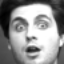

Label actual:  surprise
Predicted Label: surprise


In [17]:
test_image(72,images_f,images_f_2,Model)

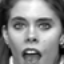

Label actual:  surprise
Predicted Label: surprise


In [18]:
test_image(36,images_f,images_f_2,Model)